# CAPSTONE PROJECT MODULE 3
## Latar Belakang
Sebuah perusahaan E-commerce ingin melakukan evaluasi *churn rate* atau rasio pelanggan yang berhenti berlangganan dalam periode waktu tertentu atau biasa juga disebut dengan *customer churn*. Apabila pelanggan loyal berpaling, itu dapat merugikan perusahaan karena biaya yang dikeluarkan perusahaan bisa 16 kali lebih banyak untuk membawa pelanggan baru ke tingkat yang sama dengan pelanggan loyal. Dengan mengetahui pelanggan mana yang akan berpotensi berpaling belangganan, perusahaan dapat menentukan salah satu mekanisme terbaik dan merespons dengan cepat untuk mencegahnya. Mendeteksi tanda-tanda awal dari potensi churn, mengenali apa yang dicari pelanggan dan meningkatkan pelayanan untuk meningkatkan kepuasan para customer sangat penting untuk mempertahankan bisnis di era persaingan ini.

## Pernyataan Masalah
Perusahaan perlu mempertahankan aktivitas pelanggan loyal di platform E-commerce dan mengurangi tingkat churn sehingga dapat melakukan pencegahan dan mengetahui faktor apa saja yang mempengaruhi pelanggan churn dan dapat menjadi pendukung pengambilan keputusan strategi pemasaran.

# Import Data
untuk menganalisa masalah tersebut kita akan menggunakan data yang telah tersedia, untuk dataset dapat diakses [di sini](https://drive.google.com/file/d/1Ipw3ZtQGEPTqkclBTmi_bA2Raor93UMr/view)

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Data Understanding

In [121]:
# Import Dataset
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [122]:
# Datatype dan Menghitung jumlah dari kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [123]:
# Jumlah baris dan kolom
df.shape

(3941, 11)

In [124]:
# Menunjukkan statistik deskriptif masing-masing kolom
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


Dari dataset ini informasi yang kita dapat terdapat 11 kolom, yaitu :
1. **Tenure** : Masa tenure pelanggan
2. **Warehouse to Home** : Jarak antara warehouse ke rumah pelanggan
3. **Number of Device** : Jumlah perangkat yang terdaftar
4. **Prefered Order Cat** : Kategori disukai pelanggan bulan lalu
5. **Satisfaction Score** : Skor kepuasan pelanggan
6. **Marital** : Status pernikahan pelanggan
7. **Number of Address** : Jumlah alamat yang terdaftar
8. **Complain** : 0 - Tidak Ada complain, 1 - ada complain
9. **Day Since Last Order** : Hari sejak pemesanan terakhir
10. **Cashback Amount** : Rata-rata cashback bulan lalu
11. **Churn** : 0 - Tidak churn , 1 - Churn

Dan dari data diatas dapat diketahui juga beberapa hal, antara lain:

- Terdapat 3941 baris
- Data numerik dengan variabel quantitave antara lain `Tenure`, `Warehouse to Home`,` Number of Device`, `Number of Address`, `Day Since Last Order`, dan `Cashback Amount`. Data numerik yang menunjukkan yes or no atau bersifat qualitative adalah `complain`, dan `churn`. Data numerik yang menunjukkan qualitative dengan scale ordinal adalah `satisfaction score`. Data kategorik ada dua antara lain `Prefered Order Cat` dan `Marital`.

# Data Cleaning
## Data Duplikat

In [125]:
# Data unik masing-masing fitur
listItem = []
for col in df.columns :
    listItem.append([col, df[col].nunique(), df[col].unique()]);

dfDesc = pd.DataFrame(columns=['dataFeatures','unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,unique,uniqueSample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Dari data diatas dapat dilihat bahwa dari fitur kategori yang disukai terdapat 2 kategori yang sama yaitu 'Mobile' dan 'Mobile Phone', sehingga semua baris dengan kategori 'Mobile' pada kolom tersebut akan diganti menjadi 'Mobile Phone'.

In [126]:
# Menghitung Jumlah per Kategori
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

In [127]:
# Mengubah Mobile menjadi Mobile Phone
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1458
Mobile Phone          1446
Fashion                585
Grocery                273
Others                 179
Name: PreferedOrderCat, dtype: int64

Karena tidak adanya informasi Customer ID pada dataset sehingga langkah yang dilakukan selanjutnya adalah melihat setiap baris yang memiliki data yang sama.

In [128]:
# Melihat Jumlah Data Duplikat
Duplikat = df.duplicated().sum()
PersentaseDup = round((df.duplicated().sum()/df.shape[0])*100,2)
print (f'Data duplikat : {Duplikat}, Persentase Data Duplikat: {PersentaseDup}')

Data duplikat : 672, Persentase Data Duplikat: 17.05


Terdapat 672 data duplikat dari 3941 baris dengan persentase 17,05%. Karena pada dataset tidak adanya Customer ID data dianggap benar-benar duplikat. Langkah yang dilakukan untuk menangani data duplikat adalah menghapus baris duplikat. Data duplikat harus dihapus karena dapat mempengaruhi performa model machine learning yang dibuat hasil evaluasi data test bisa menjadi bias karena adanya information leakage dari data yang ditraining.

In [129]:
# Menghapus data duplikat
df.drop_duplicates(inplace=True)
print(f'shape data: {df.shape}, cek data duplikat: {df.duplicated().sum()}')

shape data: (3269, 11), cek data duplikat: 0


## Missing Values
Setelah memahami data secara garis besar, perlu dicari apakah terdapat missing values atau tidak yaitu sebagai berikut:

In [130]:
df.isna().sum()

Tenure                      159
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [131]:
# Kalkulasi missing value
print(f'''Jumlah missing value: {df.isnull().sum().sum()}
Jumlah baris dengan missing value: {df[df.isnull().any(axis=1)].shape[0]}
Persentase Baris dengan missing value: {round(df.isnull().sum().sum()/df.shape[0]*100,2)}%''')

Jumlah missing value: 475
Jumlah baris dengan missing value: 475
Persentase Baris dengan missing value: 14.53%


Karena jumlah missing value cukup besar yaitu 14,53%, baris yang berisi missing value tidak akan didrop karena dapat mengurangi jumlah data dan informasi yang diketahui. Semua missing value diatas merupakan data numerik dalam tipe float dengan jenis kontinu.

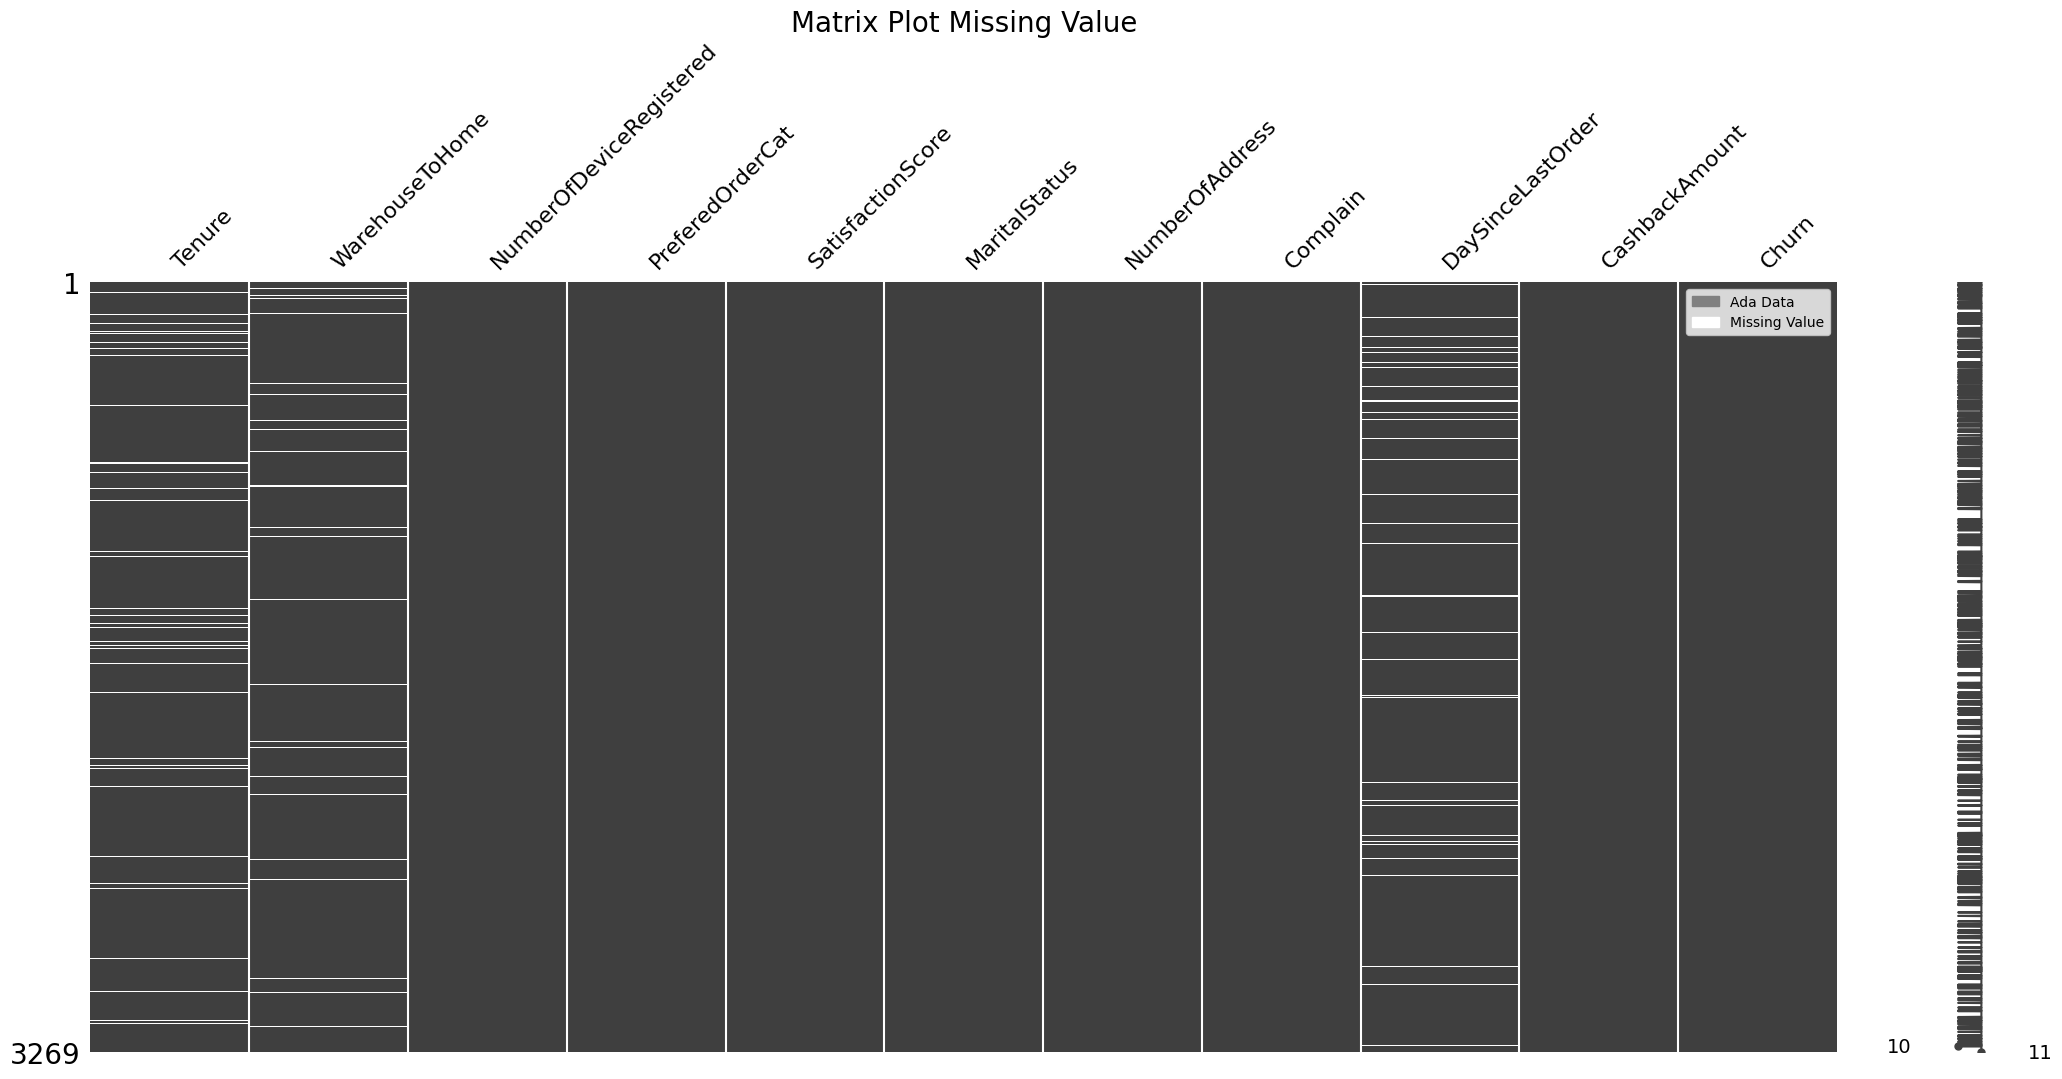

In [132]:
# Melihat missing value dengan matrix plot
msno.matrix(df)
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value', fontsize=20)
plt.show()

Terlihat bahwa missing value tidak menunjukkan pola tertentu dan cukup acak. Dari fitur diatas, variabel yang dapat berpengaruh antara lain SatisfactionScore dan CashbackAmount yang berdampak langsung pada transaksi. Sehingga akan dilakukan sort berdasarkan dua variabel tersebut.

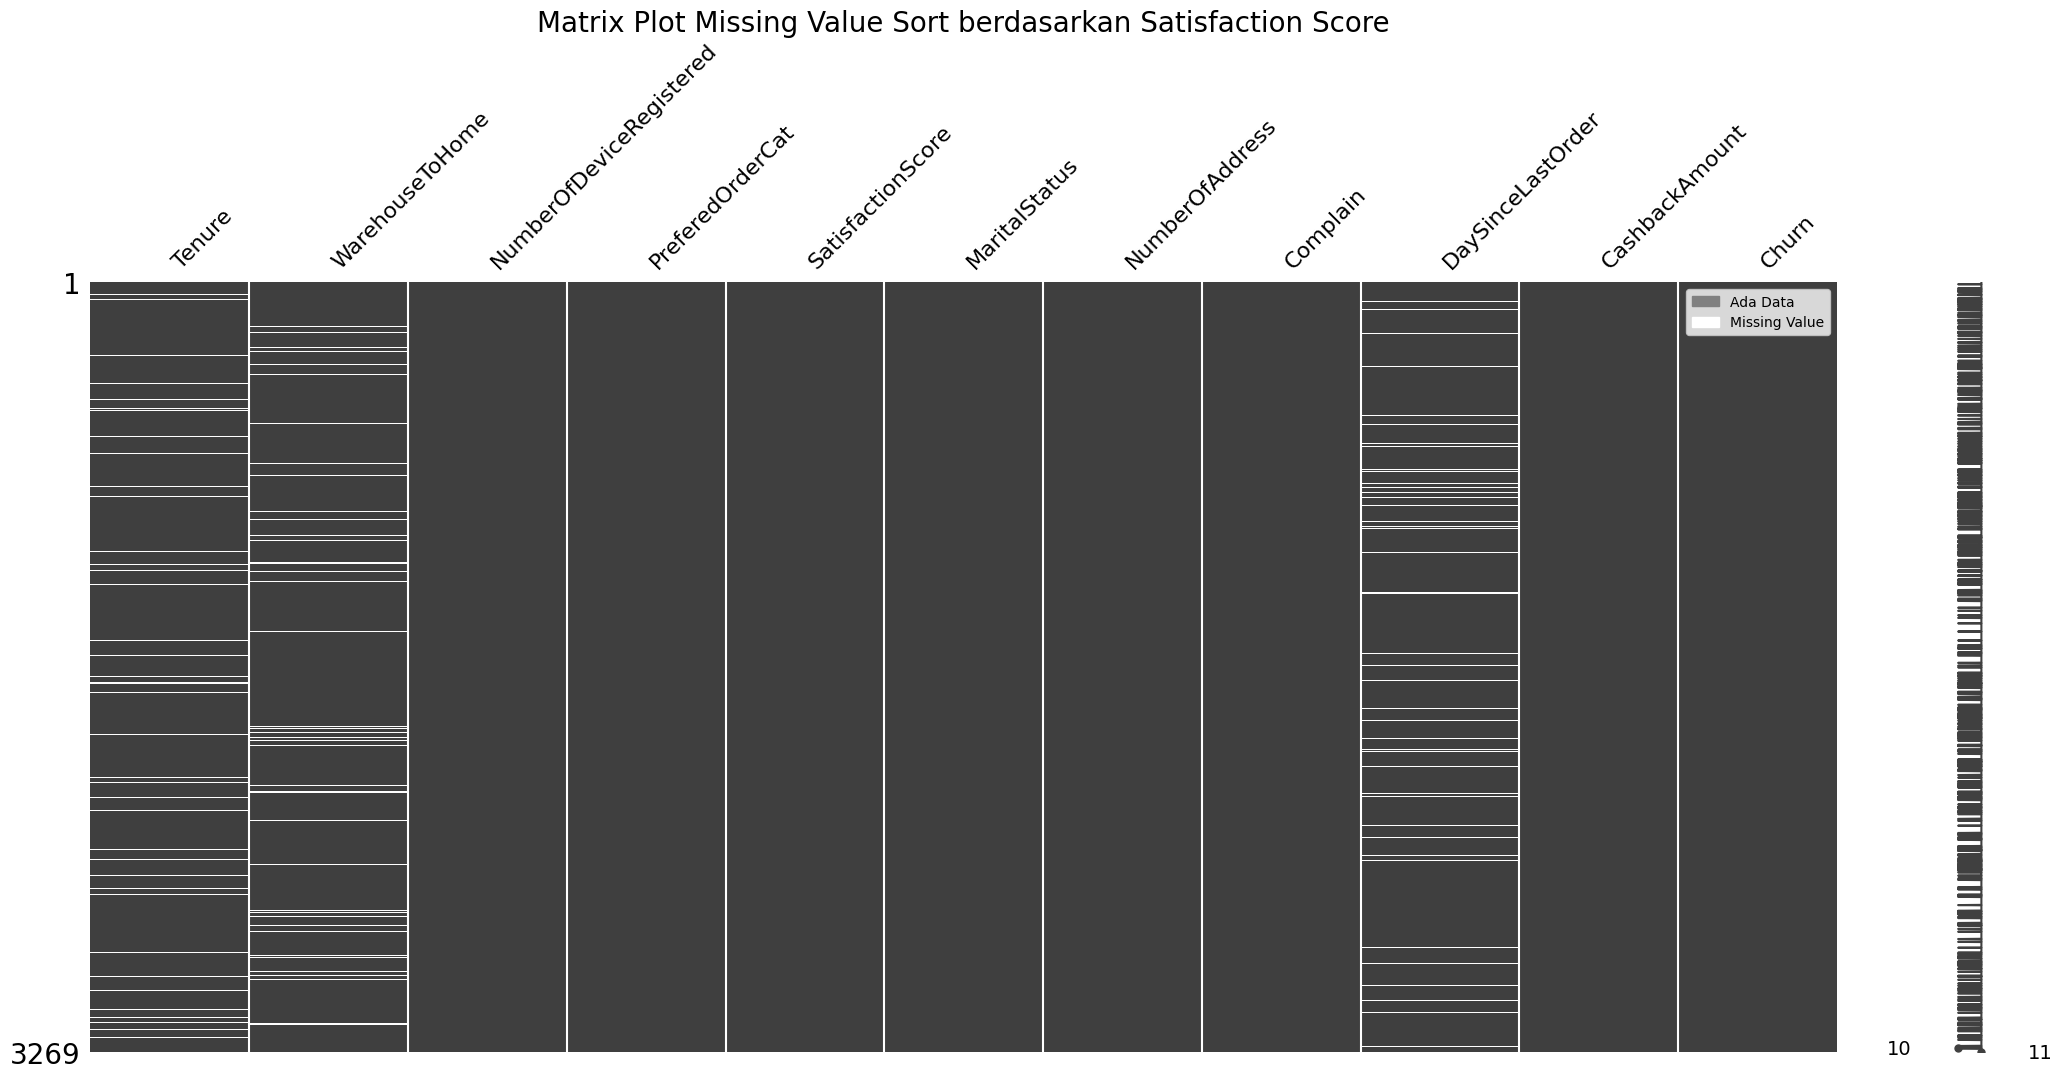

In [133]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['SatisfactionScore'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Satisfaction Score', fontsize=20)
plt.show()

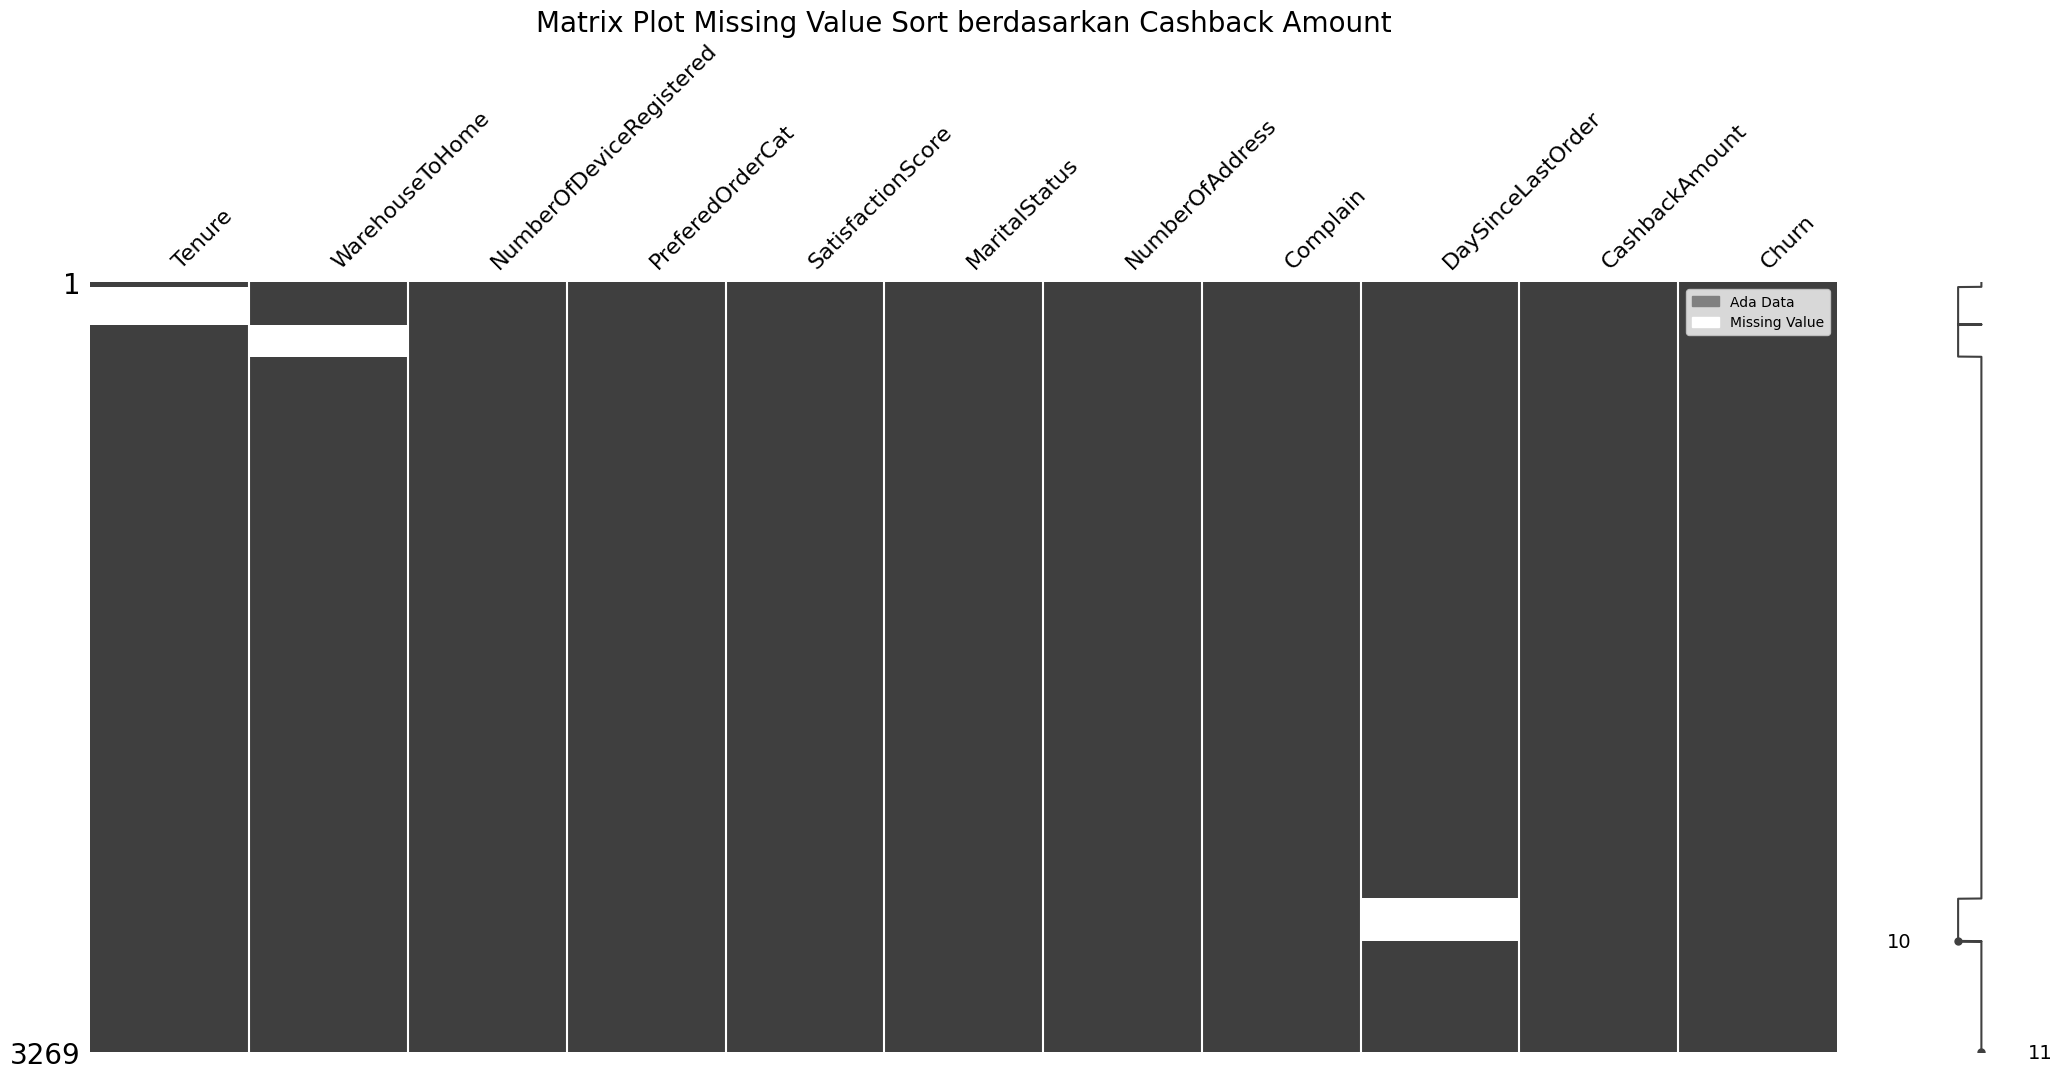

In [134]:
# Matrix missingness berdasarkan satisfaction score
msno.matrix(df.sort_values(by=['CashbackAmount'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Cashback Amount', fontsize=20)
plt.show()

In [135]:
# Describe kolom missing value berdasarkan tenure
df[df['Tenure'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,0.0,159.000000,159.000000,159,159.000000,159,159.000000,159.000000,159.000000,159.000000,159.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,152,NaN,75,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.408805,3.238994,NaN,3.100629,NaN,3.201258,0.264151,2.150943,120.415535,0.295597
std,NaN,7.680498,0.822616,NaN,1.303331,NaN,2.425549,0.442273,2.413540,2.744332,0.457753
min,NaN,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,112.000000,0.000000
25%,NaN,8.000000,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,120.280000,0.000000
50%,NaN,13.000000,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,121.090000,0.000000
75%,NaN,19.000000,4.000000,NaN,4.000000,NaN,4.000000,1.000000,3.000000,122.180000,1.000000


In [136]:
# Describe kolom missing value berdasarkan WarehouseToHome
df[df['WarehouseToHome'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,135.000000,0.0,135.000000,135,135.000000,135,135.000000,135.000000,135.000000,135.000000,135.000000
unique,NaN,NaN,NaN,2,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Mobile Phone,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,130,NaN,57,NaN,NaN,NaN,NaN,NaN
mean,6.059259,NaN,3.192593,NaN,3.014815,NaN,3.355556,0.303704,2.444444,124.609778,0.333333
std,7.308514,NaN,0.868145,NaN,1.450606,NaN,2.414096,0.461569,2.610732,1.008970,0.473160
min,0.000000,NaN,1.000000,NaN,1.000000,NaN,1.000000,0.000000,0.000000,123.180000,0.000000
25%,0.000000,NaN,3.000000,NaN,2.000000,NaN,2.000000,0.000000,0.000000,123.720000,0.000000
50%,3.000000,NaN,3.000000,NaN,3.000000,NaN,2.000000,0.000000,2.000000,124.500000,0.000000
75%,10.000000,NaN,4.000000,NaN,4.000000,NaN,5.000000,1.000000,3.000000,125.590000,1.000000


In [137]:
# Describe kolom missing value berdasarkan DaySinceLastOrder
df[df['DaySinceLastOrder'].isna()].describe(include=['object','float','int'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,181.000000,181.000000,181.000000,181,181.000000,181,181.000000,181.000000,0.0,181.000000,181.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Fashion,NaN,Married,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,138,NaN,102,NaN,NaN,NaN,NaN,NaN
mean,11.812155,15.718232,4.077348,NaN,2.883978,NaN,4.850829,0.259669,NaN,220.978232,0.165746
std,8.492354,8.251138,0.933682,NaN,1.434812,NaN,2.585185,0.439669,NaN,6.544886,0.372884
min,0.000000,6.000000,1.000000,NaN,1.000000,NaN,1.000000,0.000000,NaN,209.340000,0.000000
25%,5.000000,9.000000,4.000000,NaN,1.000000,NaN,3.000000,0.000000,NaN,215.100000,0.000000
50%,10.000000,14.000000,4.000000,NaN,3.000000,NaN,4.000000,0.000000,NaN,221.370000,0.000000
75%,19.000000,19.000000,5.000000,NaN,4.000000,NaN,6.000000,1.000000,NaN,227.210000,0.000000


Dari matrix plot diatas, dapat dilihat bahwa data hilang secara acak (General pattern) tetapi memiliki hubungan dengan variabel CashbackAmount. Hal ini menunjukkan data Missing at Random (MAR) atau terdapat hubungan sistematis antara variabel yang hilang dan variabel lain, tetapi tidak pada variabel yang memiliki missing value itu sendiri. Dari data diketahui beberapa hal:

- Data Tenure yang kosong memiliki range rata-rata cashback dari 112,00 sampai 123,13
- Data WarehouseToHome yang kosong memiliki range rata-rata cashback dari 123,18 sampai 126,57
- Data DaySinceLastOrder yang kosong memiliki range rata-rata cashback dari 209,34 sampai 231,42
- Setiap Missing value dari masing-masing feature memiliki kesamaan yaitu nilai kategori marital status terbanyak adalah Married

Sehingga akan dianalisa lebih lanjut apabila ada hubungan antara kolom MaritalStatus dengan kolom kosong

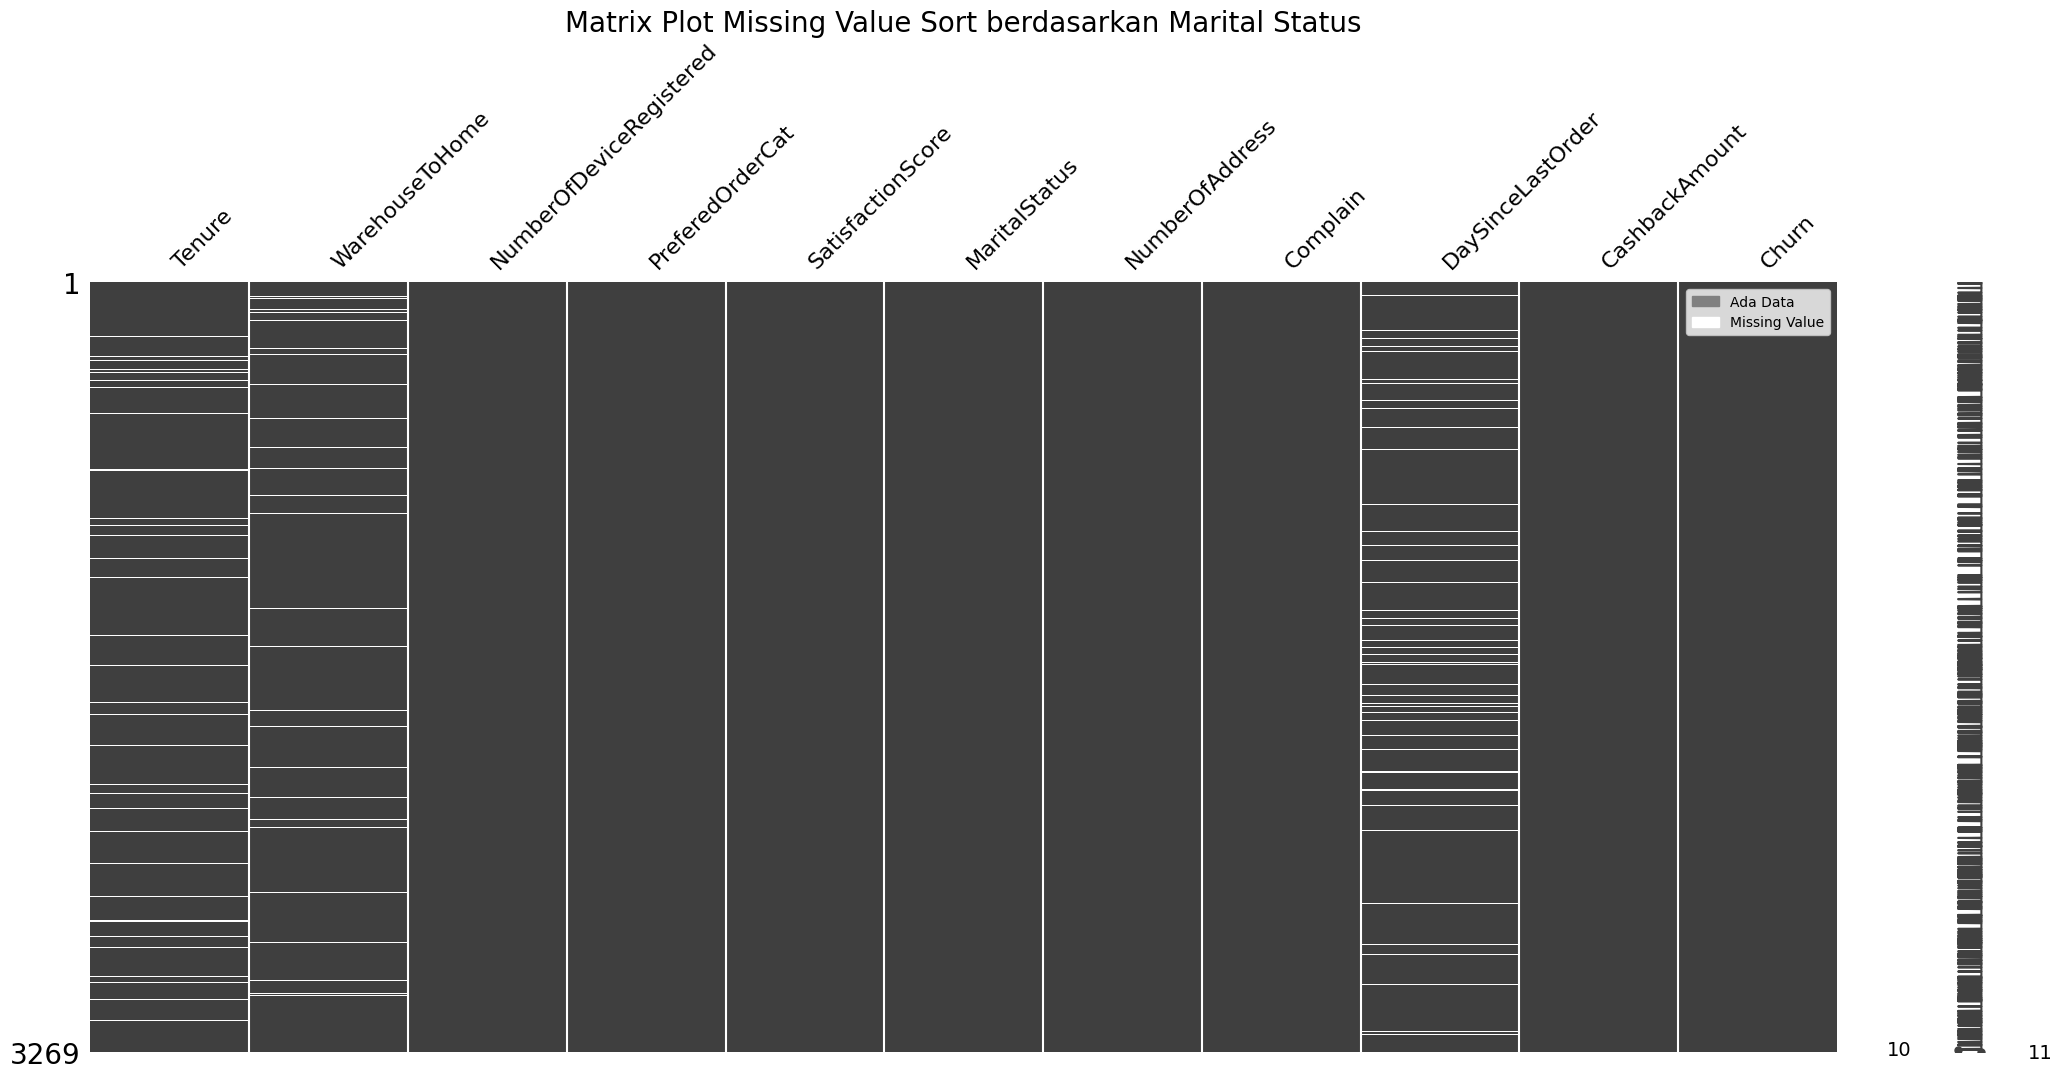

In [138]:
# Matrix missingness berdasarkan Marital Status
msno.matrix(df.sort_values(by=['MaritalStatus'], axis=0, ascending=True))
gray_patch = mpatches.Patch(color='gray', label='Ada Data')
white_patch = mpatches.Patch(color='white', label='Missing Value')
plt.legend(handles=[gray_patch, white_patch])
plt.title('Matrix Plot Missing Value Sort berdasarkan Marital Status', fontsize=20)
plt.show()

In [139]:
# Melihat total data hilang dengan kategori Married pada Marital Status
(df[df['MaritalStatus']=='Married'].isna().sum()/df.isna().sum())*100

Tenure                      47.169811
WarehouseToHome             42.222222
NumberOfDeviceRegistered          NaN
PreferedOrderCat                  NaN
SatisfactionScore                 NaN
MaritalStatus                     NaN
NumberOfAddress                   NaN
Complain                          NaN
DaySinceLastOrder           56.353591
CashbackAmount                    NaN
Churn                             NaN
dtype: float64

In [140]:
print(f'''Jumlah data :\n{df['MaritalStatus'].value_counts()}

Persentase data: \n{df['MaritalStatus'].value_counts('Married')*100}''')

Jumlah data :
Married     1686
Single      1007
Divorced     576
Name: MaritalStatus, dtype: int64

Persentase data: 
Married     51.575405
Single      30.804527
Divorced    17.620067
Name: MaritalStatus, dtype: float64


berdasarkan Marital Status tidak menunjukkan pola tertentu, selain itu kolom Marital Status dengan kategori Married memang memiliki proporsi terbanyak pada dataset, sehingga diambil kesimpulan bahwa marital status married tidak memberikan pengaruh pada hilangnya data.

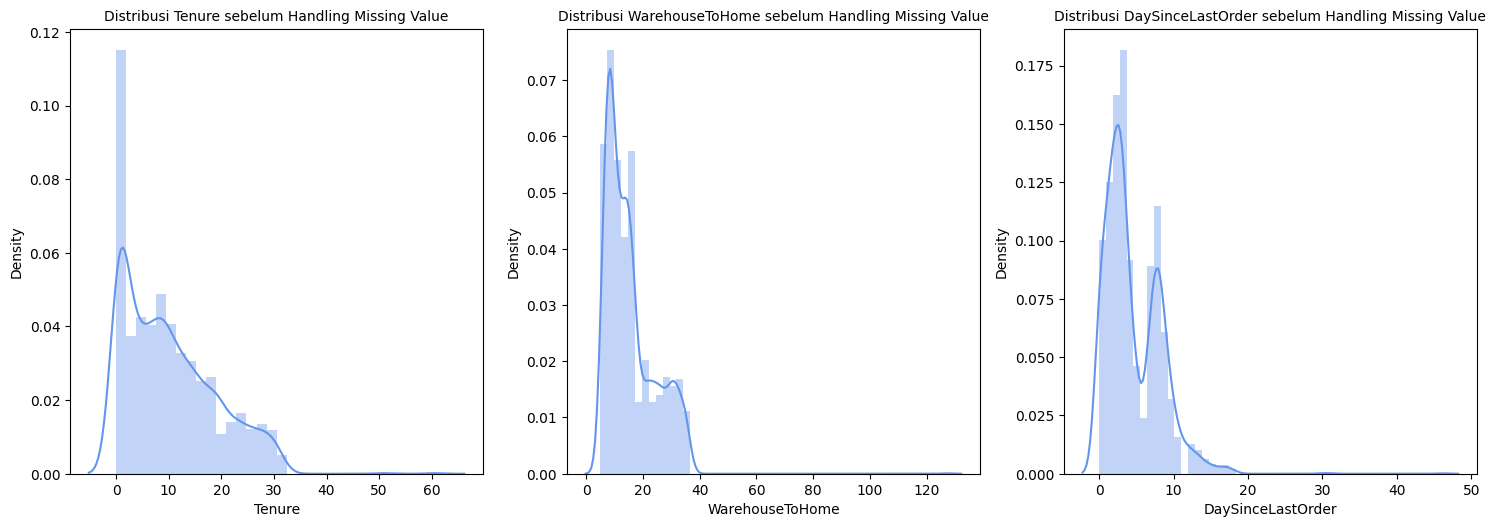

In [144]:
features = ['Tenure','WarehouseToHome', 'DaySinceLastOrder']
plt.figure(figsize=(15,15))

for i in range(0, len(features)):
  plt.subplot(3, 3, i+1)
  sns.distplot(df[features[i]], color='cornflowerblue')
  plt.tight_layout()
  plt.title(f'Distribusi {features[i]} sebelum Handling Missing Value', fontsize=10)

TypeError: list indices must be integers or slices, not DataFrame

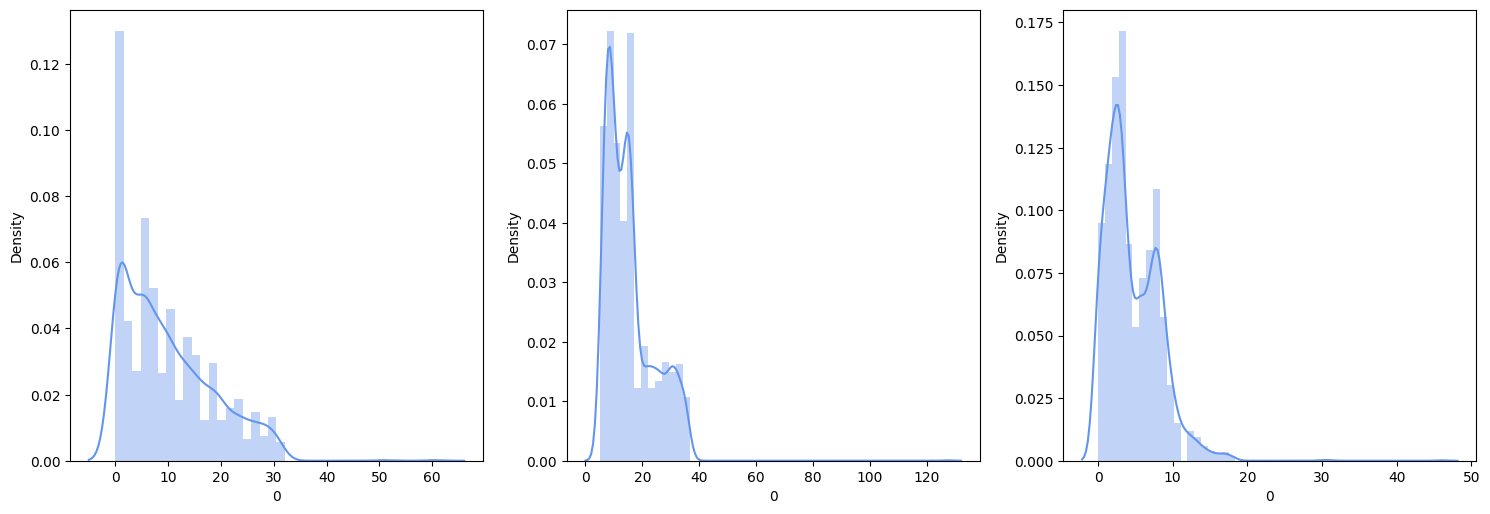

In [150]:
imputer = IterativeImputer(random_state=0)
TenureAft = pd.DataFrame(imputer.fit_transform(df[['Tenure','CashbackAmount']]))
WarehouseToHomeAft = pd.DataFrame(imputer.fit_transform(df[['WarehouseToHome','CashbackAmount']]))
DaySinceLastOrderAft = pd.DataFrame(imputer.fit_transform(df[['DaySinceLastOrder','CashbackAmount']]))

ImputerDataFrame = [TenureAft,WarehouseToHomeAft, DaySinceLastOrderAft]
plt.figure(figsize=(15,15))
a=0
for i in ImputerDataFrame:
  plt.subplot(3, 3, a+1)
  sns.distplot(i[0], color='cornflowerblue')
  plt.tight_layout()
  a+=1
plt.title(f'Distribusi {features[i]} setelah Handling Missing Value', fontsize=10)

## outliers